<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Link" data-toc-modified-id="Link-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Link</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Test</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#General-form" data-toc-modified-id="General-form-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>General form</a></span></li></ul></li><li><span><a href="#Solve" data-toc-modified-id="Solve-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Solve</a></span><ul class="toc-item"><li><span><a href="#$W_0$" data-toc-modified-id="$W_0$-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>$W_0$</a></span></li><li><span><a href="#$\overline{V}_0,-\overline{C}_0$" data-toc-modified-id="$\overline{V}_0,-\overline{C}_0$-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>$\overline{V}_0, \overline{C}_0$</a></span></li><li><span><a href="#$V_0,-D_0,-C_0$" data-toc-modified-id="$V_0,-D_0,-C_0$-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>$V_0, D_0, C_0$</a></span></li></ul></li><li><span><a href="#Simulate" data-toc-modified-id="Simulate-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Simulate</a></span></li><li><span><a href="#Save-+-destroy-+-load" data-toc-modified-id="Save-+-destroy-+-load-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save + destroy + load</a></span><ul class="toc-item"><li><span><a href="#Save" data-toc-modified-id="Save-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Save</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Load</a></span></li></ul></li><li><span><a href="#HTML" data-toc-modified-id="HTML-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>HTML</a></span></li></ul></div>

**Abstract** This notebook shows how to use *Spacitally Adapative Sparse Grids* (SASG) to solve a dynamic programming model with *value function iteration* (VFI). The code relies on Tasmanian Sparse Grids (5.1) and NLopt (2.4.2). The code is designed to run under Windows with "Visual Studio Community 2017" (install from here https://www.visualstudio.com/downloads/).

**Suggested work flow:**

* Edit code in the Sublime text-editor
* Run notebook with some add-ons:
 * Short-cuts: Help -> Edit Keyboard Shortcuts -> Restart and run all -> Ctrl+Q
 * Nbextensions: "Codefolding" and "Table of Contents (2)" 

**Overview:**

Everything is run from this module. The folder "cppfuncs" contains C++ files. The folder "data" contains saved data.

**Python files:**

* *VFI_SASG.py*: Defines the model class and its methods
* *converter.py*: Generic functions for interfacing with C++

**C++ files:**

* *VFI_SASG.cpp*: Gateway (generic)
* *auxiliary.cpp*: Load, save, destroy, evaluate_all (generic)
* *solve.cpp*: VFI solution method (generic)
* *structs.cpp*: Define model parameter struct (model-specific)
* *belmman.cpp*: Define Bellman equations (model-specific)
* *Gamma.cpp*: Define transition equations (model-specific)
* *HighResTimer_class.hpp*: Timer (generic)
* *logs.cpp*:Write logs (generic)
* *sandbox.cpp*: Test function for interfacing Tasmanian Sparse Grids

** Missing: **

* Full documentation
* Extrapolation
* Better control of tolerances, refinement strategy, number of grid points etc.
* Better initial guesses

**Troubleshooting:** If the C++ files cannot be accessed try to do the following:

Tasmanian:

1.  Download TASMANIAN 5.1 from https://tasmanian.ornl.gov/downloads.html
2.  Unzip into "this folder\cppfuncs"
3.  Open "Developer Command Prompt for VS 2017"
4.  Go to "C:\Program Files (x86)\Microsoft Visual Studio\2017\Community\VC\Auxiliary\Build\"
5.  Run "vcvarsall x64"
6.  Go to "this folder\cppfuncs\TASMANIAN-5.1\"
7.  Run "WindowsMake.bat"
8.  Copy libtasmaniansparsegrid.dll to "this folder"

NLopt:

1.  Download nlopt-2.4.2-dll64 from https://nlopt.readthedocs.io/
2.  Unzip into "this folder\cppfuncs"
3.  Open "Developer Command Prompt for VS 2017"
4.  Go to "this folder\cppfuncs\nlopt-2.4.2-dll54\"
5.  Run "lib /def:libnlopt-0.def machine:x64"
6.  Copy libnlopt-0.dll to "this folder"

# Setup

In [1]:
# magics and imports
%matplotlib inline
%load_ext autoreload
%autoreload 1

# external
import time
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

# internal
%aimport VFI_SASG

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:5000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

# Link

In [3]:
# create model with name "simple"
model = VFI_SASG.model('simple')
print(model)
model.link_cpp()

name: simple
compiler: msvs_2017

cpp files compiled successfully
cpp files linked successfully


# Test

maximum depth = 8


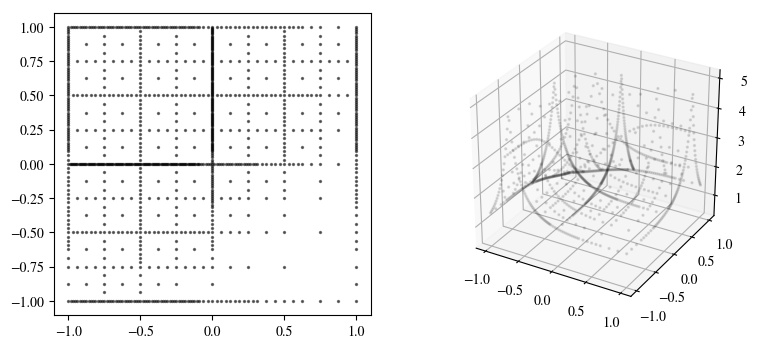

maximum depth = 12


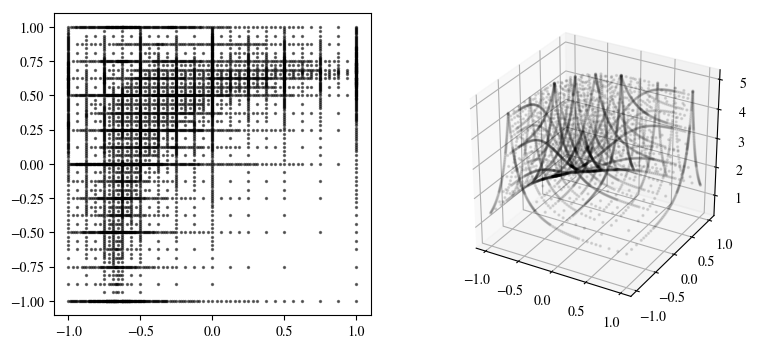

maximum depth = 16


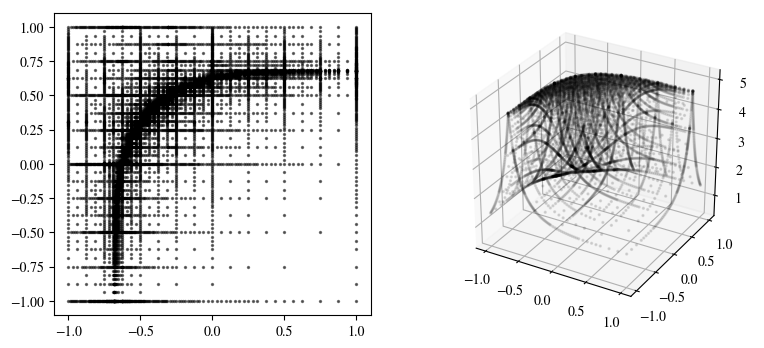

In [4]:
# call sandbox with various maximum depths
for depth_max in [8,12,16]:
    
    print('maximum depth = {}'.format(depth_max))
    
    num_points_tot, grid_points, values = model.sandbox(1e-4,2,depth_max)
    
    # figure
    fig = plt.figure(frameon=False, figsize=(9,4), dpi=100)
    
    # grids
    ax = fig.add_subplot(1,2,1)
    ax.scatter(grid_points[:,0], grid_points[:,1], s=2, c='black', alpha=0.5)    
    
    # function
    ax = fig.add_subplot(1,2,2, projection='3d')    
    ax.scatter(grid_points[:,0], grid_points[:,1], values, s=2, c='black', alpha=0.1)
    
    plt.show()


# Model

The **pre-decision** value function is:
$$
\begin{aligned}
V_{t}(M_{t},\overline{D}_{t}) &= \max_{D_{t}}\frac{(\alpha D_{t})^{1-\rho}}{1-\rho}+\overline{V}_{t}(\overline{M}_{t},D_{t}) \\
& \text{ s.t.} \\
\overline{M}_{t} &=M_{t}+\overline{D}_{t}-D_{t}
\end{aligned}
$$

The **mid-decision** value function is

$$
\begin{aligned}
\overline{V}_{t}(\overline{M}_{t},D_{t})&=\max_{C_{t}}\frac{C_{t}^{1-\rho}}{1-\rho}+W_{t}(A_{t},D_{t}) \\
& \text{ s.t.} \\
A_{t}&=\overline{M}_{t}-C_{t} \\
A_{t}&\geq 0
\end{aligned}
$$

The **post-decision** value function is

$$
\begin{aligned}
W_{t}(A_{t},D_{t})&=\mathbb{E}_{t}[V_{t+1}(M_{t+1},\overline{D}_{t+1})] \\
& \text{ s.t.} \\
M_{t+1}&=RA_{t}+1 \\
\overline{D}_{t+1}&=(1-\delta_{t+1})D_{t},\,\,\,\delta_{t+1}\sim F \\
\end{aligned}
$$

where $F$ is a known distribution.

## General form

The code is written to solve models on the following general form.

Let $S_t$, $\overline{S}_t$, $S^p_t$ and $\psi_t$ be vectors.

The **pre-decision** value function is:
$$
\begin{aligned}
V_{t}(S_{t}) &= \max_{D_{t} \in \mathcal{D}(S_t)}h(S_{t},D_{t})+\overline{V}_{t}(\overline{S}_{t}) \\
& \text{ s.t.} \\
\overline{S}_{t} &=\Gamma_{S,\overline{S}}(S_{t},D_{t})
\end{aligned}
$$

The **mid-decision** value function is

$$
\begin{aligned}
\overline{V}_{t}(\overline{S}_{t})&=\max_{C_{t} \in \mathcal{C}(\overline{S_t}) }u(C_t,\overline{S}_t)+W_{t}(S^{p}_{t}) \\
& \text{ s.t.} \\
S^{p}_{t}&=\Gamma_{\overline{S},S^{p}}(\overline{S}_{t},C_{t}) \\
\end{aligned}
$$

The **post-decision** value function is

$$
\begin{aligned}
W_{t}(S^{p}_{t})&=\mathbb{E}_{t}[V_{t+1}(S_{t+1})] \\
& \text{ s.t.} \\
S_{t+1}&=\Gamma_{S^p,S_{+}}(S^p_t,\psi_{t+1}),\,\,\,\psi_{t+1}\sim F(S^{p}_t) \\
\end{aligned}
$$

where $F$ is a known distribution.

# Solve

In [5]:
model.solve()

model solved


In [6]:
# test with different number of threads
for threads in [1,4]:
    
    del model
    model = VFI_SASG.model('simple')
    model.link_cpp()
    model.par.threads = threads
    start = time.time()
    model.solve()
    end = time.time()
    print('threads = {:2d} -> {:4.1f} secs\n'.format(threads,end - start))

grids destroyed
cpp files delinked successfully
cpp files compiled successfully
cpp files linked successfully
model solved
threads =  1 ->  9.0 secs

grids destroyed
cpp files delinked successfully
cpp files compiled successfully
cpp files linked successfully
model solved
threads =  4 ->  3.9 secs



## $W_0$

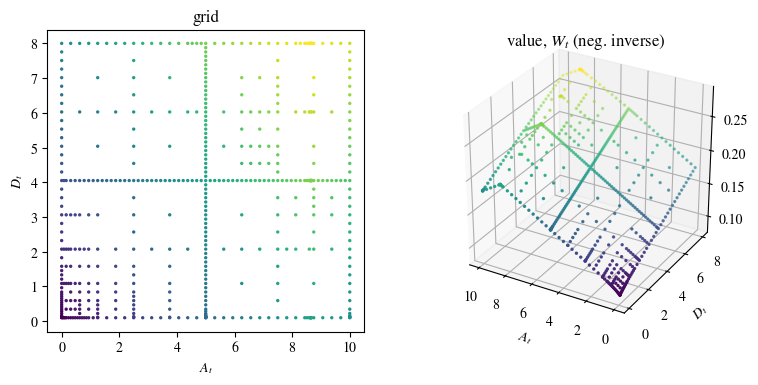

In [7]:
# plot W
if model.par.T != 1:
    ts = [0]
else:
    ts = []
    
for t in [0]:
    
    x,y = model.evaluate_all(t=t,func='W')

    fig = plt.figure(frameon=False, figsize=(9,4), dpi=100)

    A = x[:,0]
    D = x[:,1]
    W = y[:,0]

    ax = fig.add_subplot(1,2,1)
    ax.scatter(A,D,s=2,c=W)    
    ax.set_title('grid')
    ax.set_xlabel('$A_t$')
    ax.set_ylabel('$D_t$')

    ax = fig.add_subplot(1,2,2, projection='3d') 
    ax.scatter(A,D,W,s=2,c=W)
    ax.set_title('value, $W_t$ (neg. inverse)')
    ax.set_xlabel('$A_t$')
    ax.set_ylabel('$D_t$')
    ax.invert_xaxis()
    
    plt.show()    

## $\overline{V}_0, \overline{C}_0$

t = 9


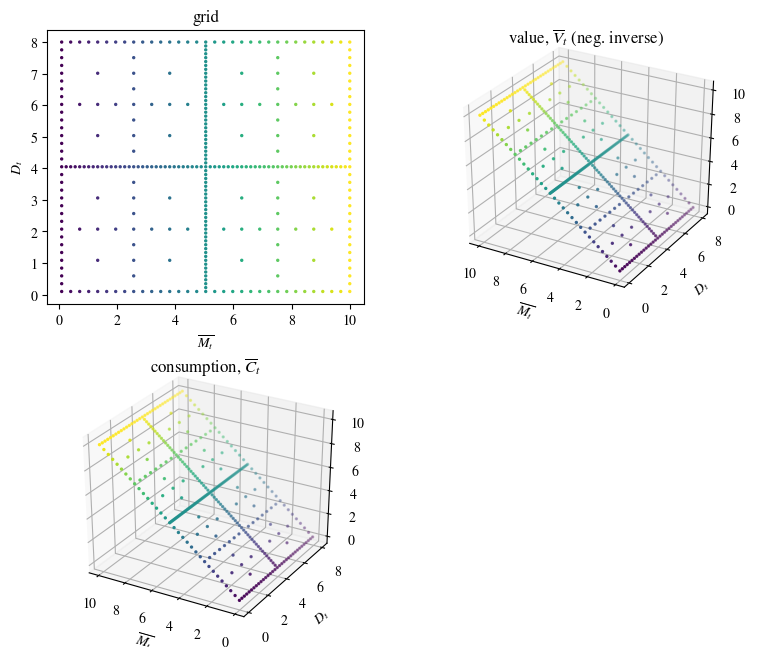

t = 0


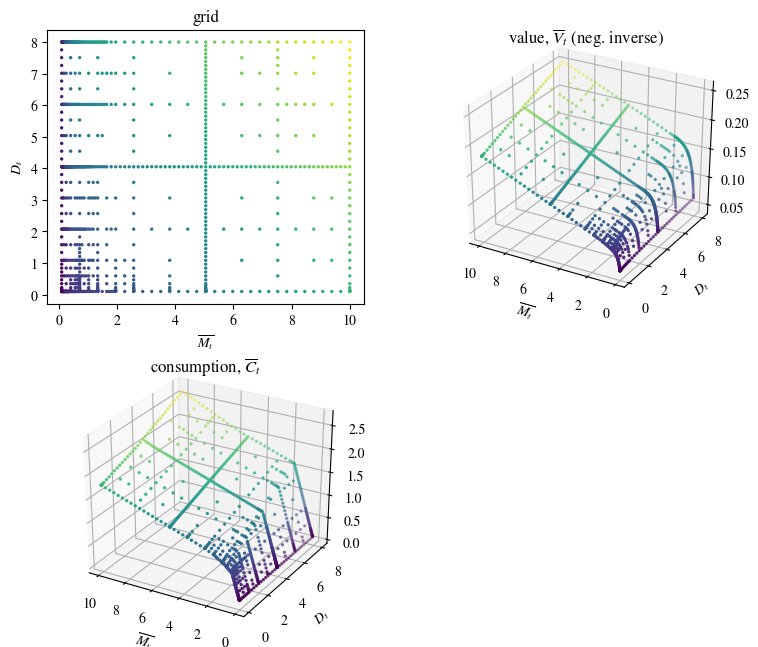

In [8]:
# plot Vbar and Cbar
for t in [model.par.T-1,0]:
    
    print('t = {}'.format(t))    
    x,y = model.evaluate_all(t=t,func='Vbar')

    fig = plt.figure(frameon=False, figsize=(9,8), dpi=100)

    Mbar = x[:,0]
    D = x[:,1]
    Vbar = y[:,0]
    Cbar = y[:,1]

    ax = fig.add_subplot(2,2,1)
    ax.scatter(Mbar,D,s=2,c=Vbar,)    
    ax.set_title('grid')
    ax.set_xlabel('$\overline{M_t}$')
    ax.set_ylabel('$D_t$')

    ax = fig.add_subplot(2,2,2, projection='3d')
    ax.scatter(Mbar,D,Vbar,s=2,c=Vbar);
    ax.set_title('value, $\overline{V}_t$ (neg. inverse)')
    ax.set_xlabel('$\overline{M_t}$')
    ax.set_ylabel('$D_t$')
    ax.invert_xaxis()

    ax = fig.add_subplot(2,2,3, projection='3d') 
    ax.scatter(Mbar,D,Cbar,s=2,c=Cbar)
    ax.set_title('consumption, $\overline{C}_t$')
    ax.set_xlabel('$\overline{M_t}$')
    ax.set_ylabel('$D_t$')
    ax.invert_xaxis()
    
    plt.show()

## $V_0, D_0, C_0$

**Test:** $V_0$ should be a function of $M_t+\overline{D}_t$.

t = 9


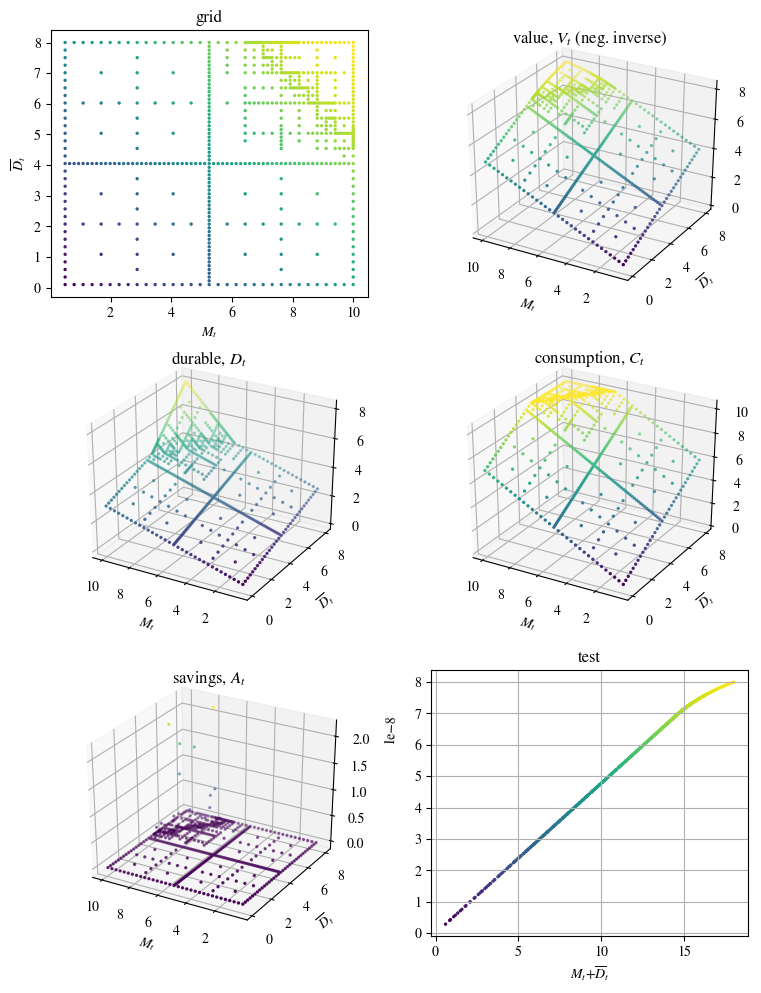

t = 0


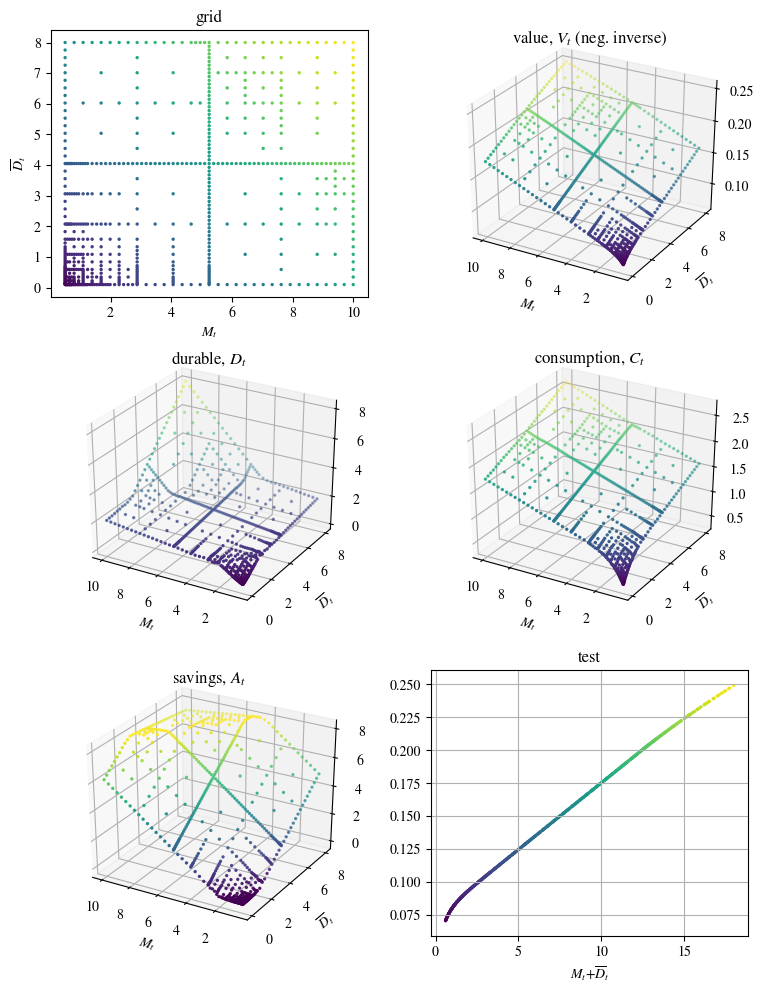

In [9]:
# plot V, D and C
for t in [model.par.T-1,0]:
        
    print('t = {}'.format(t))
    x,y = model.evaluate_all(t=t,func='V')

    fig = plt.figure(frameon=False, figsize=(9,12), dpi=100)

    M = x[:,0]
    Dbar = x[:,1]
    V = y[:,0]
    D = y[:,1]
    C = y[:,2]
    A = M + Dbar - D -C
    Mbar = M + Dbar - D 
    
    ax = fig.add_subplot(3,2,1)
    ax.set_title('grid')
    ax.scatter(M,Dbar,s=2,c=V)    
    ax.set_xlabel('$M_t$')
    ax.set_ylabel('$\overline{D}_t$')
    
    ax = fig.add_subplot(3,2,2, projection='3d') 
    ax.set_title('value, $V_t$ (neg. inverse)')
    ax.scatter(M,Dbar,V,s=2,c=V)
    ax.set_xlabel('$M_t$')
    ax.set_ylabel('$\overline{D}_t$')
    ax.invert_xaxis()

    ax = fig.add_subplot(3,2,3, projection='3d')
    ax.set_title('durable, $D_t$')
    ax.scatter(M,Dbar,D,s=2,c=D)
    ax.set_xlabel('$M_t$')
    ax.set_ylabel('$\overline{D}_t$')
    ax.invert_xaxis()

    ax = fig.add_subplot(3,2,4, projection='3d')
    ax.set_title('consumption, $C_t$')
    ax.scatter(M,Dbar,C,s=2,c=C)
    ax.set_xlabel('$M_t$')
    ax.set_ylabel('$\overline{D}_t$')
    ax.invert_xaxis()

    ax = fig.add_subplot(3,2,5, projection='3d')
    ax.set_title('savings, $A_t$')
    ax.scatter(M,Dbar,A,s=2,c=A)
    ax.set_xlabel('$M_t$')
    ax.set_ylabel('$\overline{D}_t$')
    ax.invert_xaxis()

    ax = fig.add_subplot(3,2,6)
    ax.set_title('test')
    ax.scatter(M+Dbar,V,s=2,c=V)  
    ax.grid(True)
    ax.set_xlabel('$M_t$+$\overline{D}_t$')
    
    plt.show()

# Simulate

**Test:** The consumption profile should be flat.

In [10]:
model.simulate()

model simulated


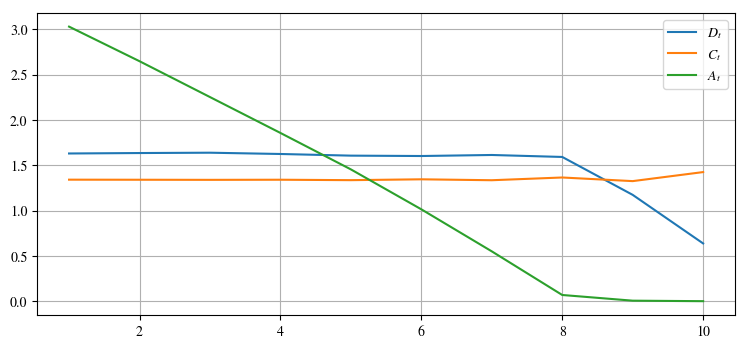

In [11]:
# plot simulation results

# a. input
ts = np.arange(1,model.par.T+1)
sim_D = np.mean(model.par.sim_D,axis=1)
sim_C = np.mean(model.par.sim_C,axis=1)
sim_A = np.mean(model.par.sim_M+model.par.sim_Dbar-model.par.sim_D-model.par.sim_C,axis=1)

# b. figure
fig = plt.figure(frameon=False, figsize=(9,4), dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(ts, sim_D,label='$D_t$')
ax.plot(ts, sim_C,label='$C_t$')
ax.plot(ts, sim_A,label='$A_t$')
ax.grid(True)
ax.legend()

plt.show()

# Save + destroy + load

## Save

In [12]:
model.save()

grids saved
grids destroyed
model parameters saved


In [13]:
del model

cpp files delinked successfully


## Load

In [14]:
model = VFI_SASG.model('loaded',load='simple')

model parameters loaded
cpp files compiled successfully
cpp files linked successfully
grids loaded


In [15]:
model.simulate()
print(model)
print(model.par.sim_C)

model simulated
name: loaded
compiler: msvs_2017

[[1.34076112]
 [1.33990502]
 [1.33879681]
 [1.34009901]
 [1.33533149]
 [1.34474675]
 [1.33459505]
 [1.36478606]
 [1.32476025]
 [1.42449851]]


# HTML

In [16]:
import os
os.system('jupyter nbconvert --to html "VFI SASG.ipynb"')

0